<a href="https://colab.research.google.com/github/vanessamo88/PredicaoDiabetes/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introdução**

Projeto baseado nos dados da página: [Diabetes Health Dataset Analysis](https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis)

O Dataset do projeto contempla dados de saúde de 1.879 pacientes identificados com números de 6000 à 7878. Os dados incluem detalhes demográficos, fatores de estilo de vida, histórico médico, relatos clinicos, medicamentos em uso, sintomas, score de qualidade de vida, fatores ambientais e comportamentos de saúde. Cada paciente está associado à um médico confidêncial, seguro de privacidade e confidencialidade.


### **Tabela de conteúdos que serão utilizados:**

# **Identificação do paciente**

**PatientID:** identificador único usado para cada paciente (6000 to 7878).

# **Dados demográficos**

**Idade:** De 20 à 90 anos

**Genero:**

0 representa masculino

1 representa feminino


# **Fatores de estilo de vida**

**BMI:** Indice de massa corpórea(IMC) variando de 15 to 40.

**Fumante:** 0 indica não e 1 indica sim.

**Consumo de alcool:** Cosumo de alcool semanal em unidades, variando de 0 à 20.

**Atividade física:** Atividade física em horas por semana, variando de 0 à 10.

**Qualidade de alimentação:** Score variando de 0 à 10

**Qualidade de sono:** Score variando de 4 à 10

# **Informação de diagnóstico**
**Diagnostico**: diagnóstico para diabetes, 0 indica não e 1 indica sim.




In [ ]:
#Bibliotecas utilizadas
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as KMean
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
#Lendo o arquivo diabetes_data.csv e transformando em um DataFrame
diabetes_df = pd.read_csv('diabetes_data.csv')
diabetes_df.head()

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0       6000   44       0          1                    2               1   
1       6001   51       1          0                    1               2   
2       6002   89       1          0                    1               3   
3       6003   21       1          1                    1               2   
4       6004   27       1          0                    1               3   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  \
0  32.985284        1            4.499365          2.443385  ...   
1  39.916764        0            1.578919          8.301264  ...   
2  19.782251        0            1.177301          6.103395  ...   
3  32.376881        1            1.714621          8.645465  ...   
4  16.808600        0           15.462549          4.629383  ...   

   TinglingHandsFeet  QualityOfLifeScore  HeavyMetalsExposure  \
0                  1           73.765109                    0   
1                  0           91.445753                    0   
2                  0           54.485744                    0   
3                  0           77.866758                    0   
4                  0           37.731808                    0   

   OccupationalExposureChemicals  WaterQuality  MedicalCheckupsFrequency  \
0                              0             0                  1.782724   
1                              0             1                  3.381070   
2                              0             0                  2.701019   
3                              0             1                  1.409056   
4                              0             0                  1.218452   

   MedicationAdherence  HealthLiteracy  Diagnosis  DoctorInCharge  
0             4.486980        7.211349          1    Confidential  
1             5.961705        5.024612          1    Confidential  
2             8.950821        7.034944          0    Confidential  
3             3.124769        4.717774          0    Confidential  
4             6.977741        7.887940          0    Confidential  

[5 rows x 46 columns]

In [ ]:
#Limpando DataFrame de variáveis vazias
diabetes_limpo_df = diabetes_df.dropna()
diabetes_limpo_df.head()

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0       6000   44       0          1                    2               1   
1       6001   51       1          0                    1               2   
2       6002   89       1          0                    1               3   
3       6003   21       1          1                    1               2   
4       6004   27       1          0                    1               3   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  \
0  32.985284        1            4.499365          2.443385  ...   
1  39.916764        0            1.578919          8.301264  ...   
2  19.782251        0            1.177301          6.103395  ...   
3  32.376881        1            1.714621          8.645465  ...   
4  16.808600        0           15.462549          4.629383  ...   

   TinglingHandsFeet  QualityOfLifeScore  HeavyMetalsExposure  \
0                  1           73.765109                    0   
1                  0           91.445753                    0   
2                  0           54.485744                    0   
3                  0           77.866758                    0   
4                  0           37.731808                    0   

   OccupationalExposureChemicals  WaterQuality  MedicalCheckupsFrequency  \
0                              0             0                  1.782724   
1                              0             1                  3.381070   
2                              0             0                  2.701019   
3                              0             1                  1.409056   
4                              0             0                  1.218452   

   MedicationAdherence  HealthLiteracy  Diagnosis  DoctorInCharge  
0             4.486980        7.211349          1    Confidential  
1             5.961705        5.024612          1    Confidential  
2             8.950821        7.034944          0    Confidential  
3             3.124769        4.717774          0    Confidential  
4             6.977741        7.887940          0    Confidential  

[5 rows x 46 columns]

Serão avaliados os dados baseados nos fatores de estilo de vida de cada paciente. Serão mantidos os dados de identificação do paciente, idade, gênero, IMC, se fumante, consumo de alcool, atividade física, qualidade da alimentação e sono. Também será mantido o diagnóstico: se há ou não presença de diabetes.

In [ ]:
#Filtrando apenas colunas de interesse
colunas_interesse = ['PatientID', 'Age', 'Gender','BMI',
                     'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                     'DietQuality', 'SleepQuality','Diagnosis']

# Criando o novo DataFrame com as colunas de interesse
diabetes_colunas_interesse_df = diabetes_df[colunas_interesse]

# Exibindo as primeiras linhas do novo DataFrame para verificar
diabetes_colunas_interesse_df.head()

PatientID  Age  Gender        BMI  Smoking  AlcoholConsumption  \
0       6000   44       0  32.985284        1            4.499365   
1       6001   51       1  39.916764        0            1.578919   
2       6002   89       1  19.782251        0            1.177301   
3       6003   21       1  32.376881        1            1.714621   
4       6004   27       1  16.808600        0           15.462549   

   PhysicalActivity  DietQuality  SleepQuality  Diagnosis  
0          2.443385     4.898831      4.049885          1  
1          8.301264     8.941093      7.508150          1  
2          6.103395     7.722543      7.708387          0  
3          8.645465     4.804044      6.286548          0  
4          4.629383     2.532756      9.771125          0

Para facilitar a visualização dos dados, as colunas numéricas serão padronizadas de modo que tenham uma média de 0 e desvio padrão de 1.

In [ ]:
#Padronizando colunas numéricas
diabetes_colunas_interesse_df['BMI_std']=diabetes_colunas_interesse_df['BMI'].apply(lambda x:(x-diabetes_colunas_interesse_df['BMI'].mean())/diabetes_colunas_interesse_df['BMI'].std())
diabetes_colunas_interesse_df['AlcoholConsumption_std']=diabetes_colunas_interesse_df['AlcoholConsumption'].apply(lambda x:(x-diabetes_colunas_interesse_df['AlcoholConsumption'].mean())/diabetes_colunas_interesse_df['AlcoholConsumption'].std())
diabetes_colunas_interesse_df['PhysicalActivity_std']=diabetes_colunas_interesse_df['PhysicalActivity'].apply(lambda x:(x-diabetes_colunas_interesse_df['PhysicalActivity'].mean())/diabetes_colunas_interesse_df['PhysicalActivity'].std())
diabetes_colunas_interesse_df['DietQuality_std']=diabetes_colunas_interesse_df['DietQuality'].apply(lambda x:(x-diabetes_colunas_interesse_df['DietQuality'].mean())/diabetes_colunas_interesse_df['DietQuality'].std())
diabetes_colunas_interesse_df['SleepQuality_std']=diabetes_colunas_interesse_df['SleepQuality'].apply(lambda x:(x-diabetes_colunas_interesse_df['SleepQuality'].mean())/diabetes_colunas_interesse_df['SleepQuality'].std())
diabetes_colunas_interesse_df.head()

<ipython-input-5-d34efb149af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_colunas_interesse_df['BMI_std']=diabetes_colunas_interesse_df['BMI'].apply(lambda x:(x-diabetes_colunas_interesse_df['BMI'].mean())/diabetes_colunas_interesse_df['BMI'].std())
<ipython-input-5-d34efb149af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_colunas_interesse_df['AlcoholConsumption_std']=diabetes_colunas_interesse_df['AlcoholConsumption'].apply(lambda x:(x-diabetes_colunas_interesse_df['AlcoholCon

PatientID  Age  Gender        BMI  Smoking  AlcoholConsumption  \
0       6000   44       0  32.985284        1            4.499365   
1       6001   51       1  39.916764        0            1.578919   
2       6002   89       1  19.782251        0            1.177301   
3       6003   21       1  32.376881        1            1.714621   
4       6004   27       1  16.808600        0           15.462549   

   PhysicalActivity  DietQuality  SleepQuality  Diagnosis   BMI_std  \
0          2.443385     4.898831      4.049885          1  0.736713   
1          8.301264     8.941093      7.508150          1  1.700626   
2          6.103395     7.722543      7.708387          0 -1.099343   
3          8.645465     4.804044      6.286548          0  0.652106   
4          4.629383     2.532756      9.771125          0 -1.512869   

   AlcoholConsumption_std  PhysicalActivity_std  DietQuality_std  \
0               -0.946401             -0.965136         0.001057   
1               -1.440202              1.085216         1.410913   
2               -1.508110              0.315926         0.985909   
3               -1.417257              1.205692        -0.032003   
4                0.907299             -0.200002        -0.824181   

   SleepQuality_std  
0         -1.718124  
1          0.281486  
2          0.397266  
3         -0.424859  
4          1.589966

In [ ]:
#Excluindo colunas originais(e duplicidade) e deixando apenas colunas com valores padronizados
colunas_desejadas = [col for col in diabetes_colunas_interesse_df.columns if col.endswith('PatientID') or col.endswith('Age') or col.endswith('Gender') or col.endswith('Diagnosis') or col.endswith('Smoking') or col.endswith('_std')]
diabetes_colunas_interesse_filtrado_df = diabetes_colunas_interesse_df[colunas_desejadas]
diabetes_colunas_interesse_filtrado_df = diabetes_colunas_interesse_filtrado_df.drop(columns=['bmi_std'], errors='ignore')
diabetes_colunas_interesse_filtrado_df.head()

PatientID  Age  Gender  Smoking  Diagnosis   BMI_std  \
0       6000   44       0        1          1  0.736713   
1       6001   51       1        0          1  1.700626   
2       6002   89       1        0          0 -1.099343   
3       6003   21       1        1          0  0.652106   
4       6004   27       1        0          0 -1.512869   

   AlcoholConsumption_std  PhysicalActivity_std  DietQuality_std  \
0               -0.946401             -0.965136         0.001057   
1               -1.440202              1.085216         1.410913   
2               -1.508110              0.315926         0.985909   
3               -1.417257              1.205692        -0.032003   
4                0.907299             -0.200002        -0.824181   

   SleepQuality_std  
0         -1.718124  
1          0.281486  
2          0.397266  
3         -0.424859  
4          1.589966

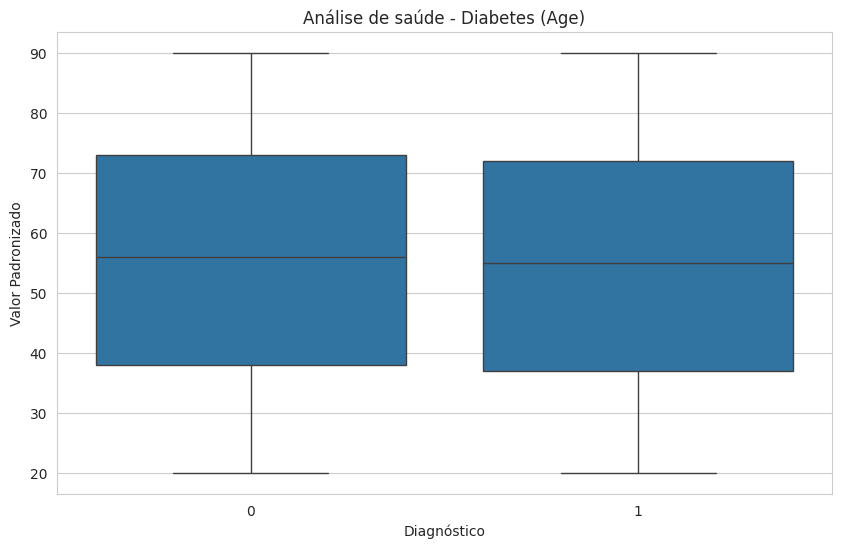

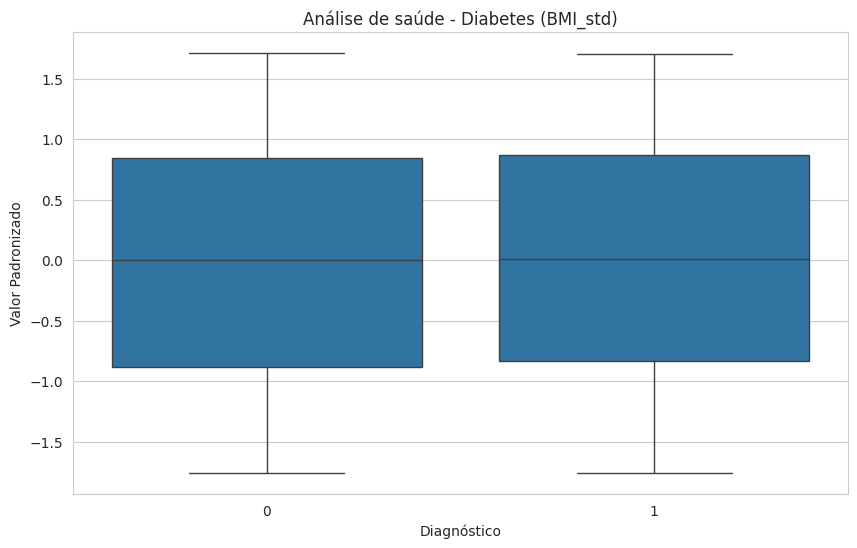

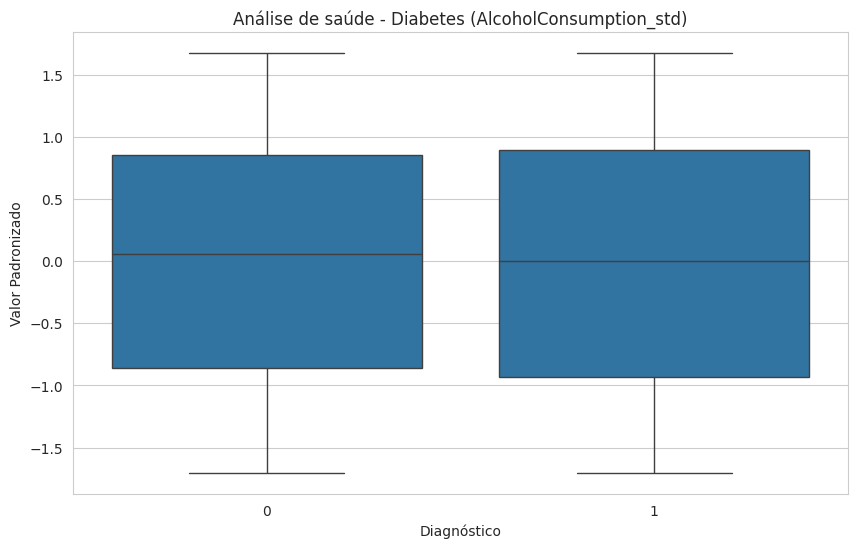

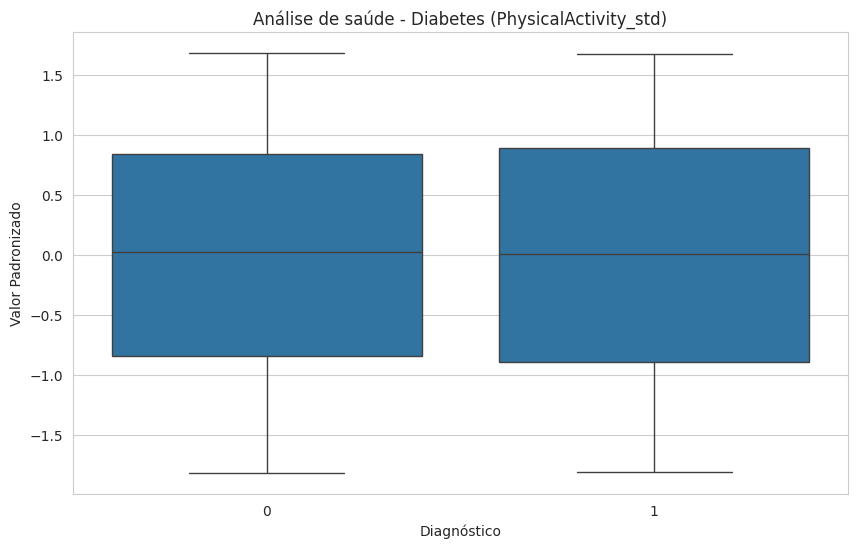

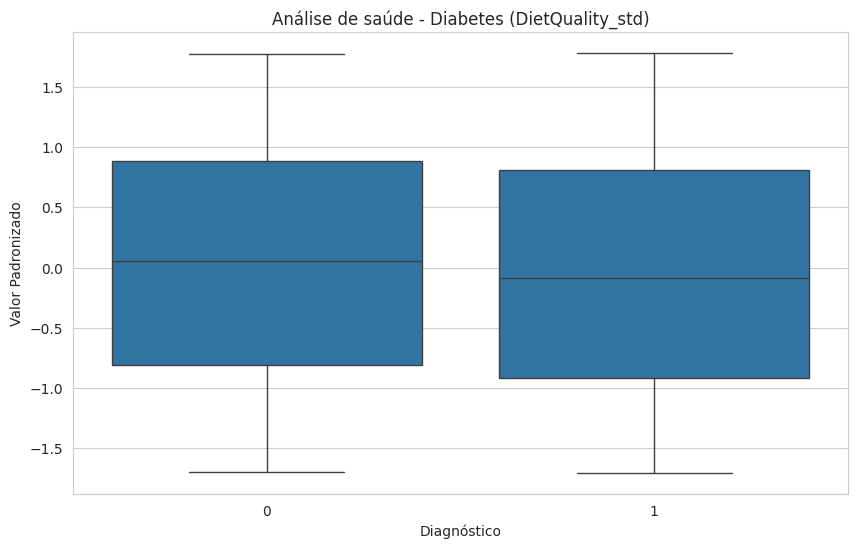

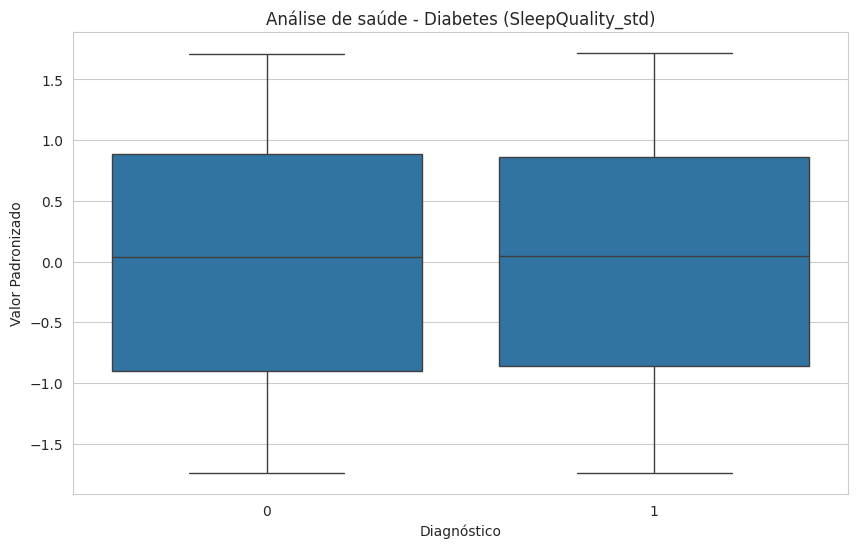

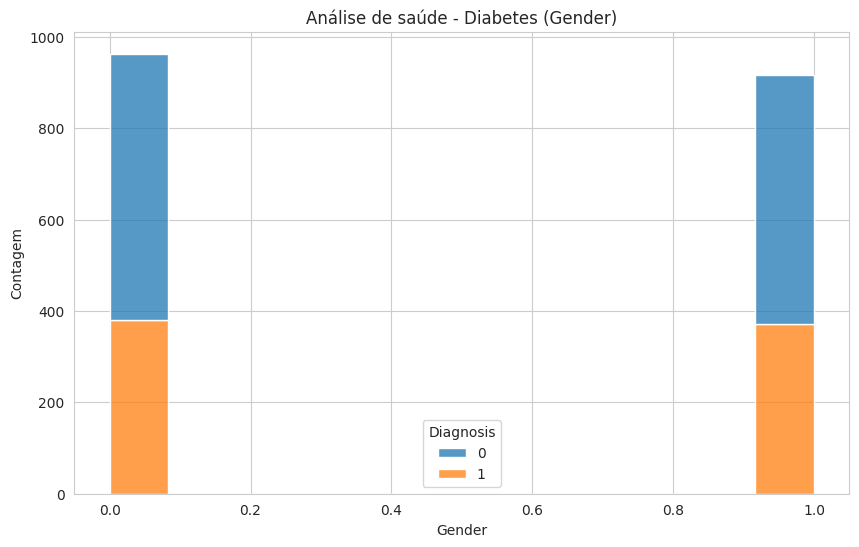

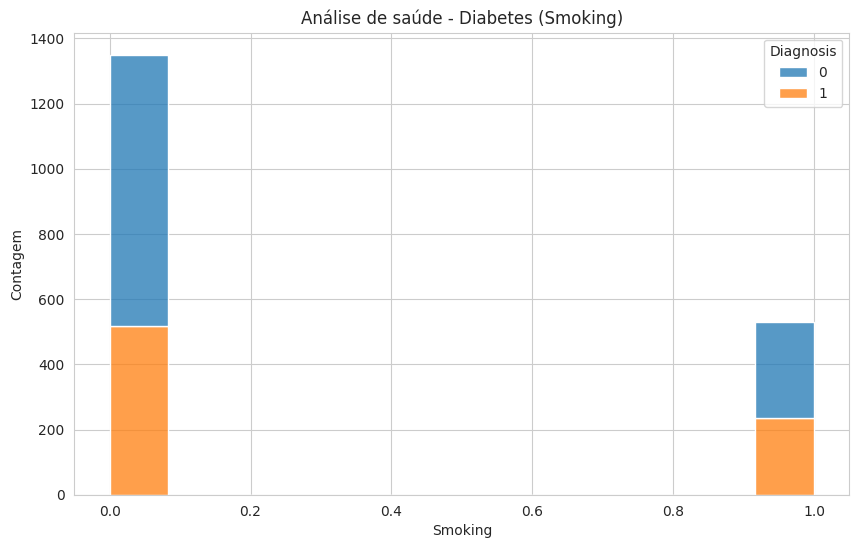

In [ ]:
#Gráficos comparando cara fator com o diagnóstico de diabetes
# Filtra as colunas desejadas, excluindo 'PatientID'
colunas_desejadas = [col for col in diabetes_colunas_interesse_filtrado_df.columns if col != 'PatientID' and col != 'Gender' and col != 'Smoking' and col != 'Diagnosis']

# Plotando boxplots para as variáveis desejadas
for coluna in colunas_desejadas:
    plt.figure(figsize=(10, 6))
    with sns.axes_style('whitegrid'):
        grafico = sns.boxplot(x=diabetes_colunas_interesse_filtrado_df['Diagnosis'], y=diabetes_colunas_interesse_filtrado_df[coluna])
        grafico.set_title(f'Análise de saúde - Diabetes ({coluna})')
        grafico.set_xlabel('Diagnóstico')
        grafico.set_ylabel('Valor Padronizado')
        plt.show()

# Plotando histplots para 'Gender' e 'Smoking'
for coluna in ['Gender', 'Smoking']:
    plt.figure(figsize=(10, 6))
    with sns.axes_style('whitegrid'):
        grafico = sns.histplot(data=diabetes_colunas_interesse_filtrado_df, x=coluna, hue='Diagnosis', multiple='stack')
        grafico.set_title(f'Análise de saúde - Diabetes ({coluna})')
        grafico.set_xlabel(coluna)
        grafico.set_ylabel('Contagem')
        plt.show()


In [ ]:
diabetes_colunas_interesse_filtrado_df = diabetes_colunas_interesse_filtrado_df.drop(['PatientID'], axis=1)
diabetes_colunas_interesse_filtrado_df.head()

Age  Gender  Smoking  Diagnosis   BMI_std  AlcoholConsumption_std  \
0   44       0        1          1  0.736713               -0.946401   
1   51       1        0          1  1.700626               -1.440202   
2   89       1        0          0 -1.099343               -1.508110   
3   21       1        1          0  0.652106               -1.417257   
4   27       1        0          0 -1.512869                0.907299   

   PhysicalActivity_std  DietQuality_std  SleepQuality_std  
0             -0.965136         0.001057         -1.718124  
1              1.085216         1.410913          0.281486  
2              0.315926         0.985909          0.397266  
3              1.205692        -0.032003         -0.424859  
4             -0.200002        -0.824181          1.589966

In [ ]:
#Criando modelo de treino, gerando clusters
model = KMean()
model = KMean(n_clusters = 10)
model = model.fit(diabetes_colunas_interesse_filtrado_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.__dict__

{'n_clusters': 10,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['Age', 'Gender', 'Smoking', 'Diagnosis', 'BMI_std',
        'AlcoholConsumption_std', 'PhysicalActivity_std',
        'DietQuality_std', 'SleepQuality_std'], dtype=object),
 'n_features_in_': 9,
 '_tol': 0.0047373902988783675,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[ 3.90224719e+01,  5.00000000e-01,  2.58426966e-01,
          3.98876404e-01, -6.41134091e-03, -9.44801940e-02,
          6.05027544e-03, -7.12622836e-02, -2.89336979e-02],
        [ 7.40989583e+01,  4.89583333e-01,  2.44791667e-01,
          4.21875000e-01, -7.07427309e-02, -2.16905772e-02,
          7.64589678e-02,  7.93416405e-02, -3.56283640e-02],
        [ 2.34377880e+01,  4.83870968e-01,  2.58064516e-01,
          3.96313364e-01,  5.06871046e-03,  4.71866702e-02,
          3.

In [ ]:
wcss = []
for k in range(1, 11):
  model = KMean(n_clusters = k)
  model = model.fit(diabetes_colunas_interesse_filtrado_df)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

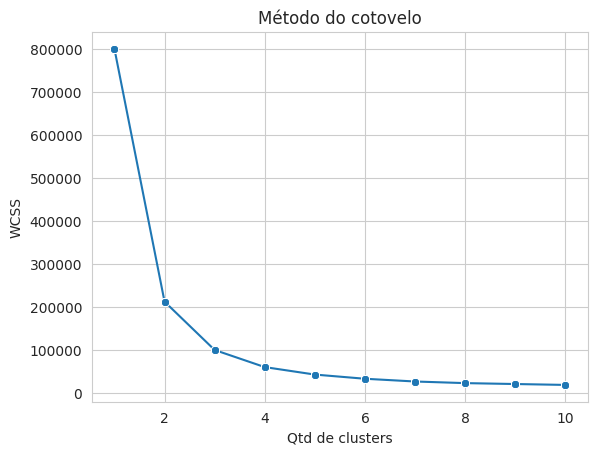

In [ ]:
#Gerando gráfico de linha dos valores do wcss pelo número de clusters
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y = wcss, marker = "8")
  grafico.set(title = 'Método do cotovelo', ylabel = 'WCSS', xlabel = 'Qtd de clusters')

In [ ]:
#Gerando modelo com 3 clusters
model = KMean(n_clusters = 3)
model = model.fit(diabetes_colunas_interesse_filtrado_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Incluindo a coluna clusters com 3 centróides na tabela
clusters = model.labels_
clustered_data =  pd.concat([diabetes_colunas_interesse_filtrado_df, pd.DataFrame(clusters, columns = ['clusters'])], axis = 1)
clustered_data.head()

Age  Gender  Smoking  Diagnosis   BMI_std  AlcoholConsumption_std  \
0   44       0        1          1  0.736713               -0.946401   
1   51       1        0          1  1.700626               -1.440202   
2   89       1        0          0 -1.099343               -1.508110   
3   21       1        1          0  0.652106               -1.417257   
4   27       1        0          0 -1.512869                0.907299   

   PhysicalActivity_std  DietQuality_std  SleepQuality_std  clusters  
0             -0.965136         0.001057         -1.718124         0  
1              1.085216         1.410913          0.281486         0  
2              0.315926         0.985909          0.397266         2  
3              1.205692        -0.032003         -0.424859         1  
4             -0.200002        -0.824181          1.589966         1

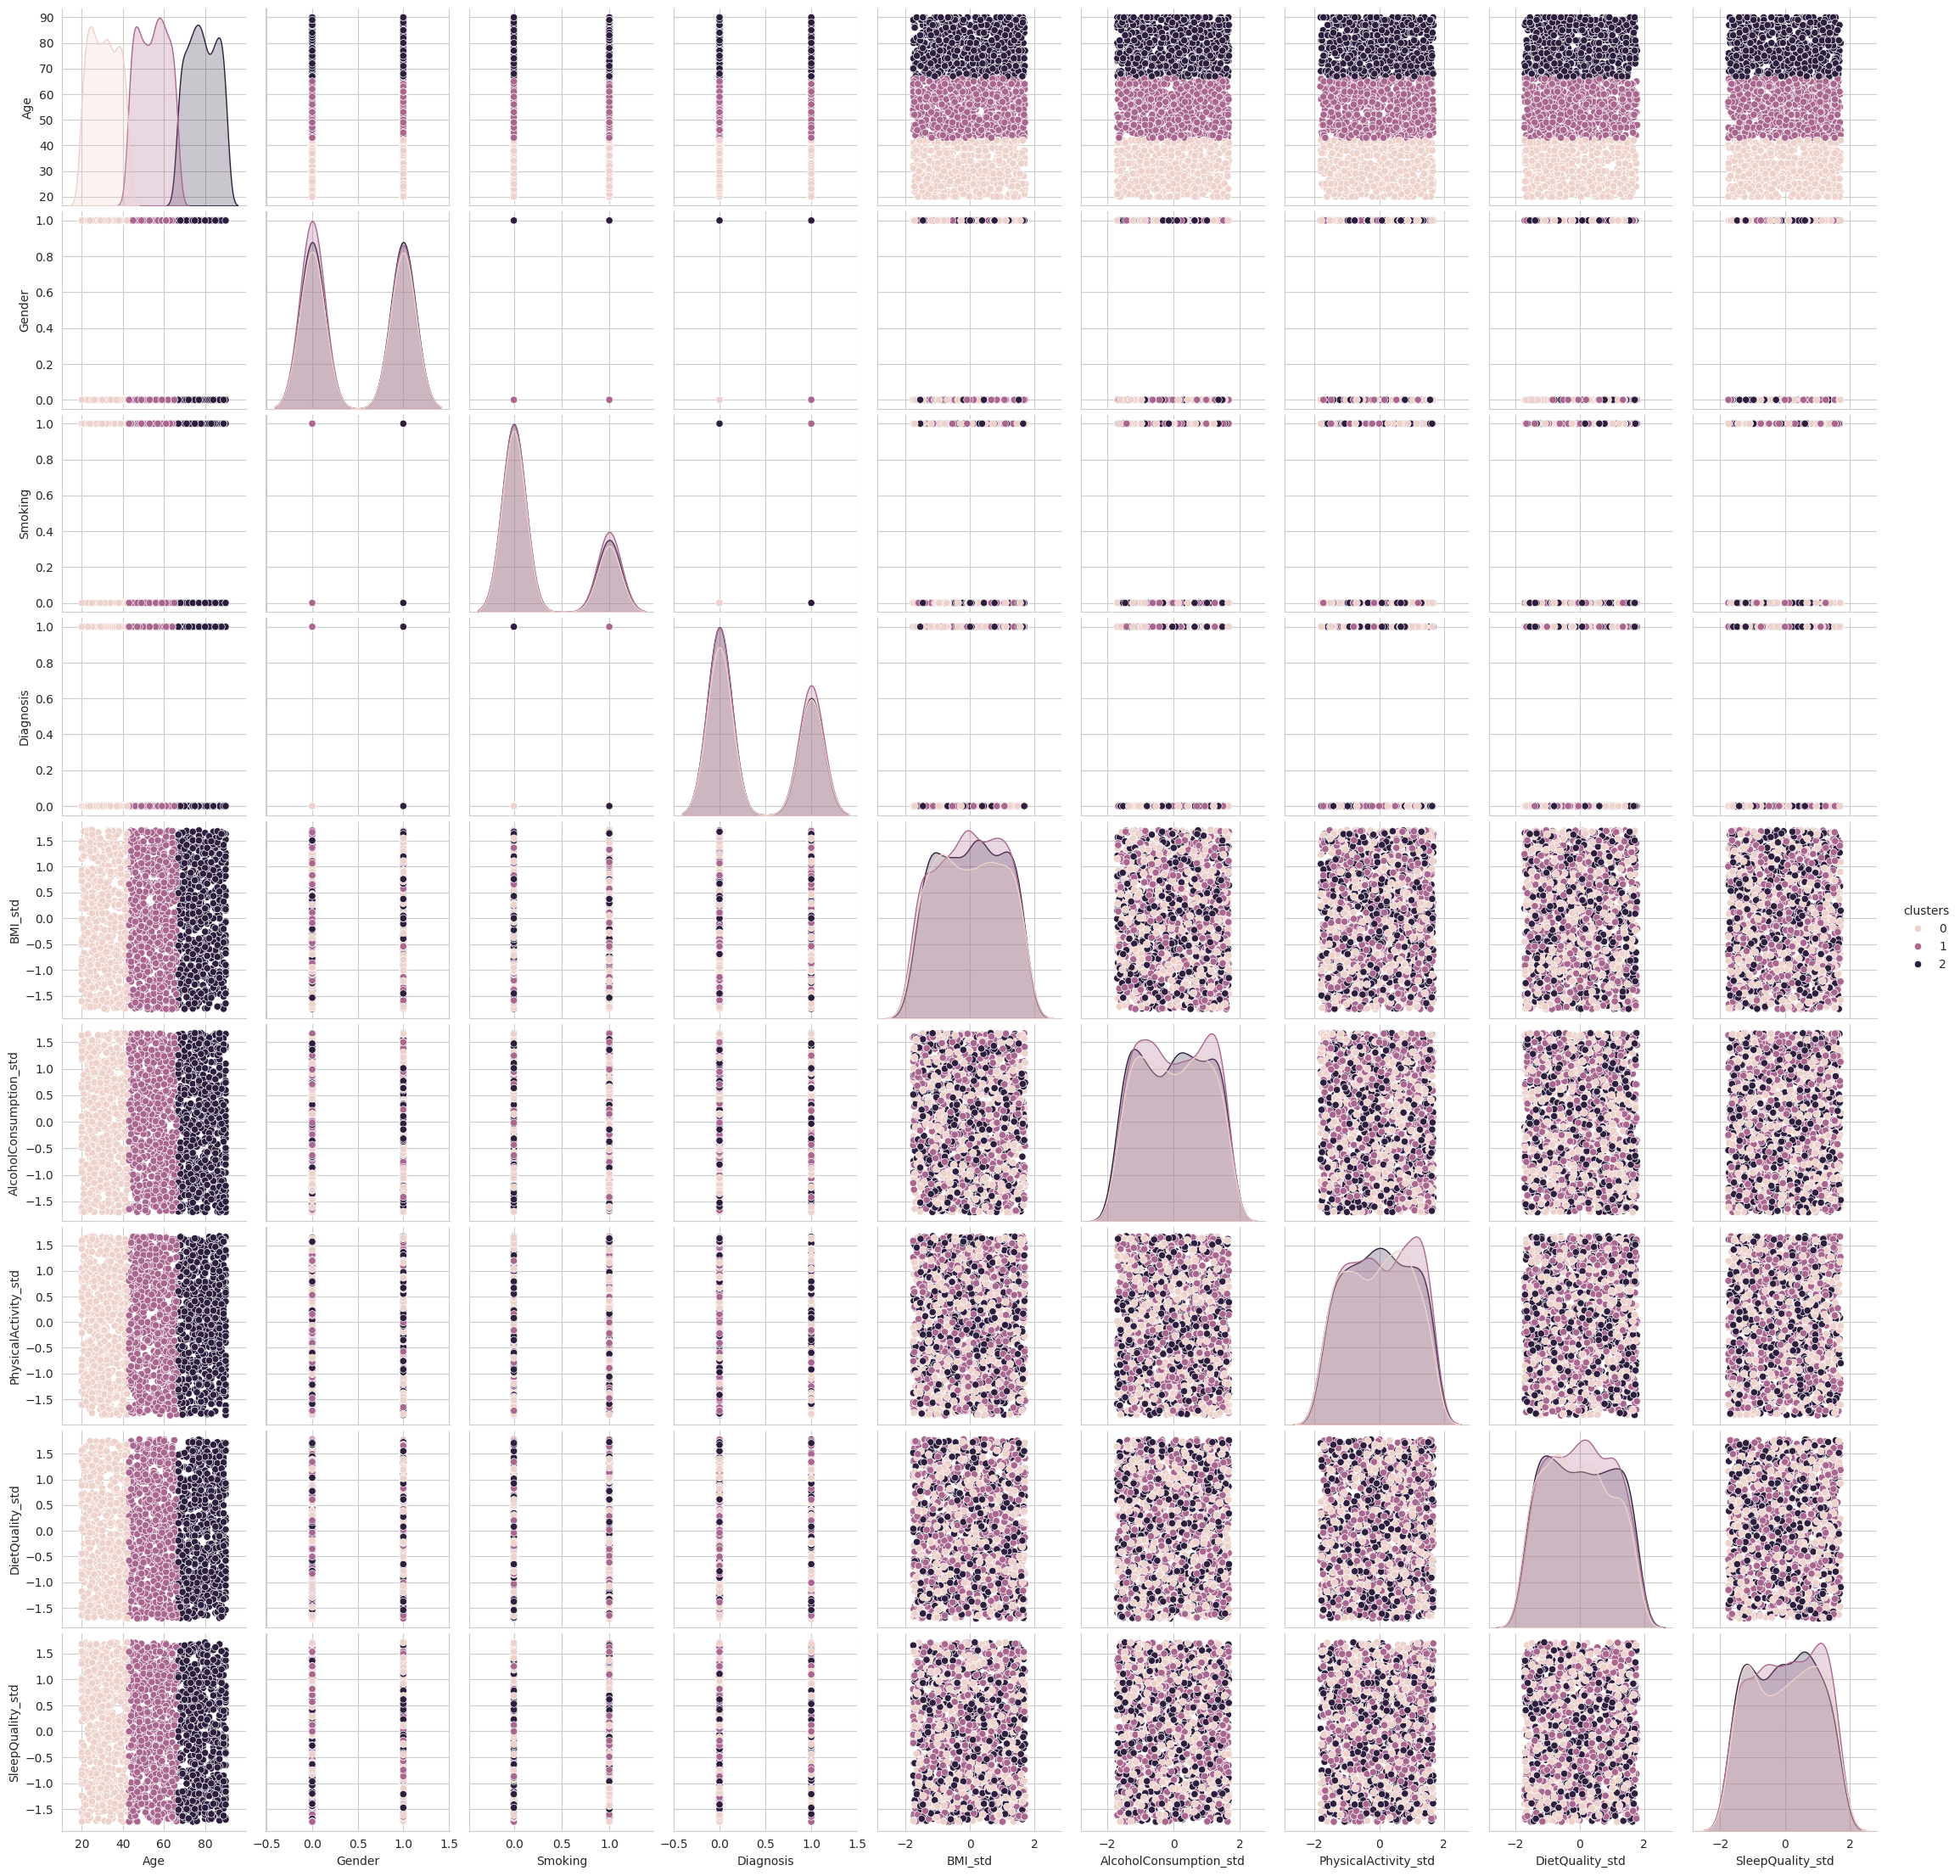

In [ ]:
#Gerando gráfico com 3 clusters
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data = clustered_data, hue = 'clusters')

In [ ]:
# Treinando o modelo KMeans escolhido (com 3 clusters)
model = KMean(n_clusters = 3)
model = model.fit(diabetes_colunas_interesse_filtrado_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Incluindo a coluna clusters escolhida na tabela original
clusters = model.labels_ # Obtendo os rótulos dos clusters
diabetes_colunas_interesse_filtrado_df['cluster'] = clusters
diabetes_colunas_interesse_filtrado_df.head()

Age  Gender  Smoking  Diagnosis   BMI_std  AlcoholConsumption_std  \
0   44       0        1          1  0.736713               -0.946401   
1   51       1        0          1  1.700626               -1.440202   
2   89       1        0          0 -1.099343               -1.508110   
3   21       1        1          0  0.652106               -1.417257   
4   27       1        0          0 -1.512869                0.907299   

   PhysicalActivity_std  DietQuality_std  SleepQuality_std  cluster  
0             -0.965136         0.001057         -1.718124        2  
1              1.085216         1.410913          0.281486        2  
2              0.315926         0.985909          0.397266        1  
3              1.205692        -0.032003         -0.424859        0  
4             -0.200002        -0.824181          1.589966        0

In [ ]:
# Separação dos dados para teste/treino
X = diabetes_colunas_interesse_filtrado_df.drop('Diagnosis', axis=1)
y = diabetes_colunas_interesse_filtrado_df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelagem
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Avaliação
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
#Resultados dos testes
print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 0.61
Matriz de Confusão:
[[224   9]
 [139   4]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.96      0.75       233
           1       0.31      0.03      0.05       143

    accuracy                           0.61       376
   macro avg       0.46      0.49      0.40       376
weighted avg       0.50      0.61      0.49       376



In [ ]:
# Validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f'Acurácias da Validação Cruzada: {cv_scores}')
print(f'Média da Acurácia da Validação Cruzada: {np.mean(cv_scores):.2f}')

Acurácias da Validação Cruzada: [0.60638298 0.59840426 0.56382979 0.58510638 0.61333333]
Média da Acurácia da Validação Cruzada: 0.59


In [ ]:
#Realizando teste com novo paciente à partir de modelo treinado

# Pré-processamento - Normalização das features
dados_avaliacao = ['Age', 'Gender', 'Smoking', 'BMI_std', 'AlcoholConsumption_std',
                     'PhysicalActivity_std', 'DietQuality_std', 'SleepQuality_std']
scaler = StandardScaler()
diabetes_colunas_interesse_filtrado_df[dados_avaliacao] = scaler.fit_transform(diabetes_colunas_interesse_filtrado_df[dados_avaliacao])

# Separação dos dados em features (X) e target (y)
X = diabetes_colunas_interesse_filtrado_df.drop(['Diagnosis', 'cluster'], axis=1)
y = diabetes_colunas_interesse_filtrado_df['Diagnosis']

# Treinamento do modelo (usando regressão logística como exemplo)
model = LogisticRegression()
model.fit(X, y)

# Exemplo de valores para fazer a previsão
novos_dados = {
    "Age": [89],
    "Gender": [0],
    "Smoking": [1],
    "BMI_std": [0.736713],
    "AlcoholConsumption_std": [-0.946401],
    "PhysicalActivity_std": [-0.965136],
    "DietQuality_std": [0.001057],
    "SleepQuality_std": [-1.718124],

}
df_novos = pd.DataFrame(novos_dados)

# Pré-processamento dos novos dados (normalização)
df_novos[dados_avaliacao] = scaler.transform(df_novos[dados_avaliacao])

# Fazer a previsão usando o modelo treinado
previsao = model.predict(df_novos)

# Mostrar a previsão
print(f'Previsão para Diagnosis: {previsao}')

Previsão para Diagnosis: [0]
